# Exercise 1

#### English

For the exercise you must look for another dataset for classification available at the UCI and
perform the following tasks:


* Import data using ucimlrepo.

* Analyze the dataset, generating visualizations.

* Perform data pre-processing by treating object type attributes, null values, normalization and dimensionality reduction.

* Split data for training and testing.

* Train four different classifiers by adjusting their hyperparameters using
cross validation.

* Generate visualizations for the following accuracy, precision and recall metrics.

* Generate the confusion matrix for each classifier.

* Plot the decision regions for the classifiers.

###### Restrictions

The dataset used for this exercise must contain a significant number of records
(i.e., thousands of data points), have null values ​​for processing and also have multiple
labels (i.e., > 2).


#### Português

Para o exercício você deve procurar outro dataset para classicação disponível no UCI e
realizar as seguintes tarefas:


*   Realizar a importação dos dados utilizando o ucimlrepo.

*   Analizar o dataset, gerando visualizações.

*   Realizar o pré-processamento dos dados tratanto atributos to tipo object, valores nulos, normalização e redução de dimensionalidade.

*   Fazer o split dos dados para treino e teste.

*   Treinar quatro classicadores diferentes ajustantando seus hiperparâmetros utilizando
validação cruzada.

*   Gerar visualizações para as seguintes métricas de acurácia, precision e recall.

*   Gerar a matriz de confusão para cada classicador.

*   Plotar as regiões de decisão para os classificadores.

###### Restrições

O dataset utilizado para esse exercício deve conter uma quantidade signicativa de registros
(i.e., milhares de dados), possuir valores nulos para tratamento e também possuir múltiplos
rótulos (i.e., > 2).

https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. For more information about the dataset, please refer to the paper:

Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille. 'A bayesian framework for learning rule sets for interpretable classification.' The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393.

- Instances:12684
- Features:25
- Has Missing Values? Yes


## Installing UCI **Repository**

In [1]:
pip install ucimlrepo

## Downloading and importing dataset

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
in_vehicle_coupon_recommendation = fetch_ucirepo(id=603)

# data (as pandas dataframes)
X = in_vehicle_coupon_recommendation.data.features
y = in_vehicle_coupon_recommendation.data.targets


## Data visualization of Dataset

### Describing data

In [2]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0


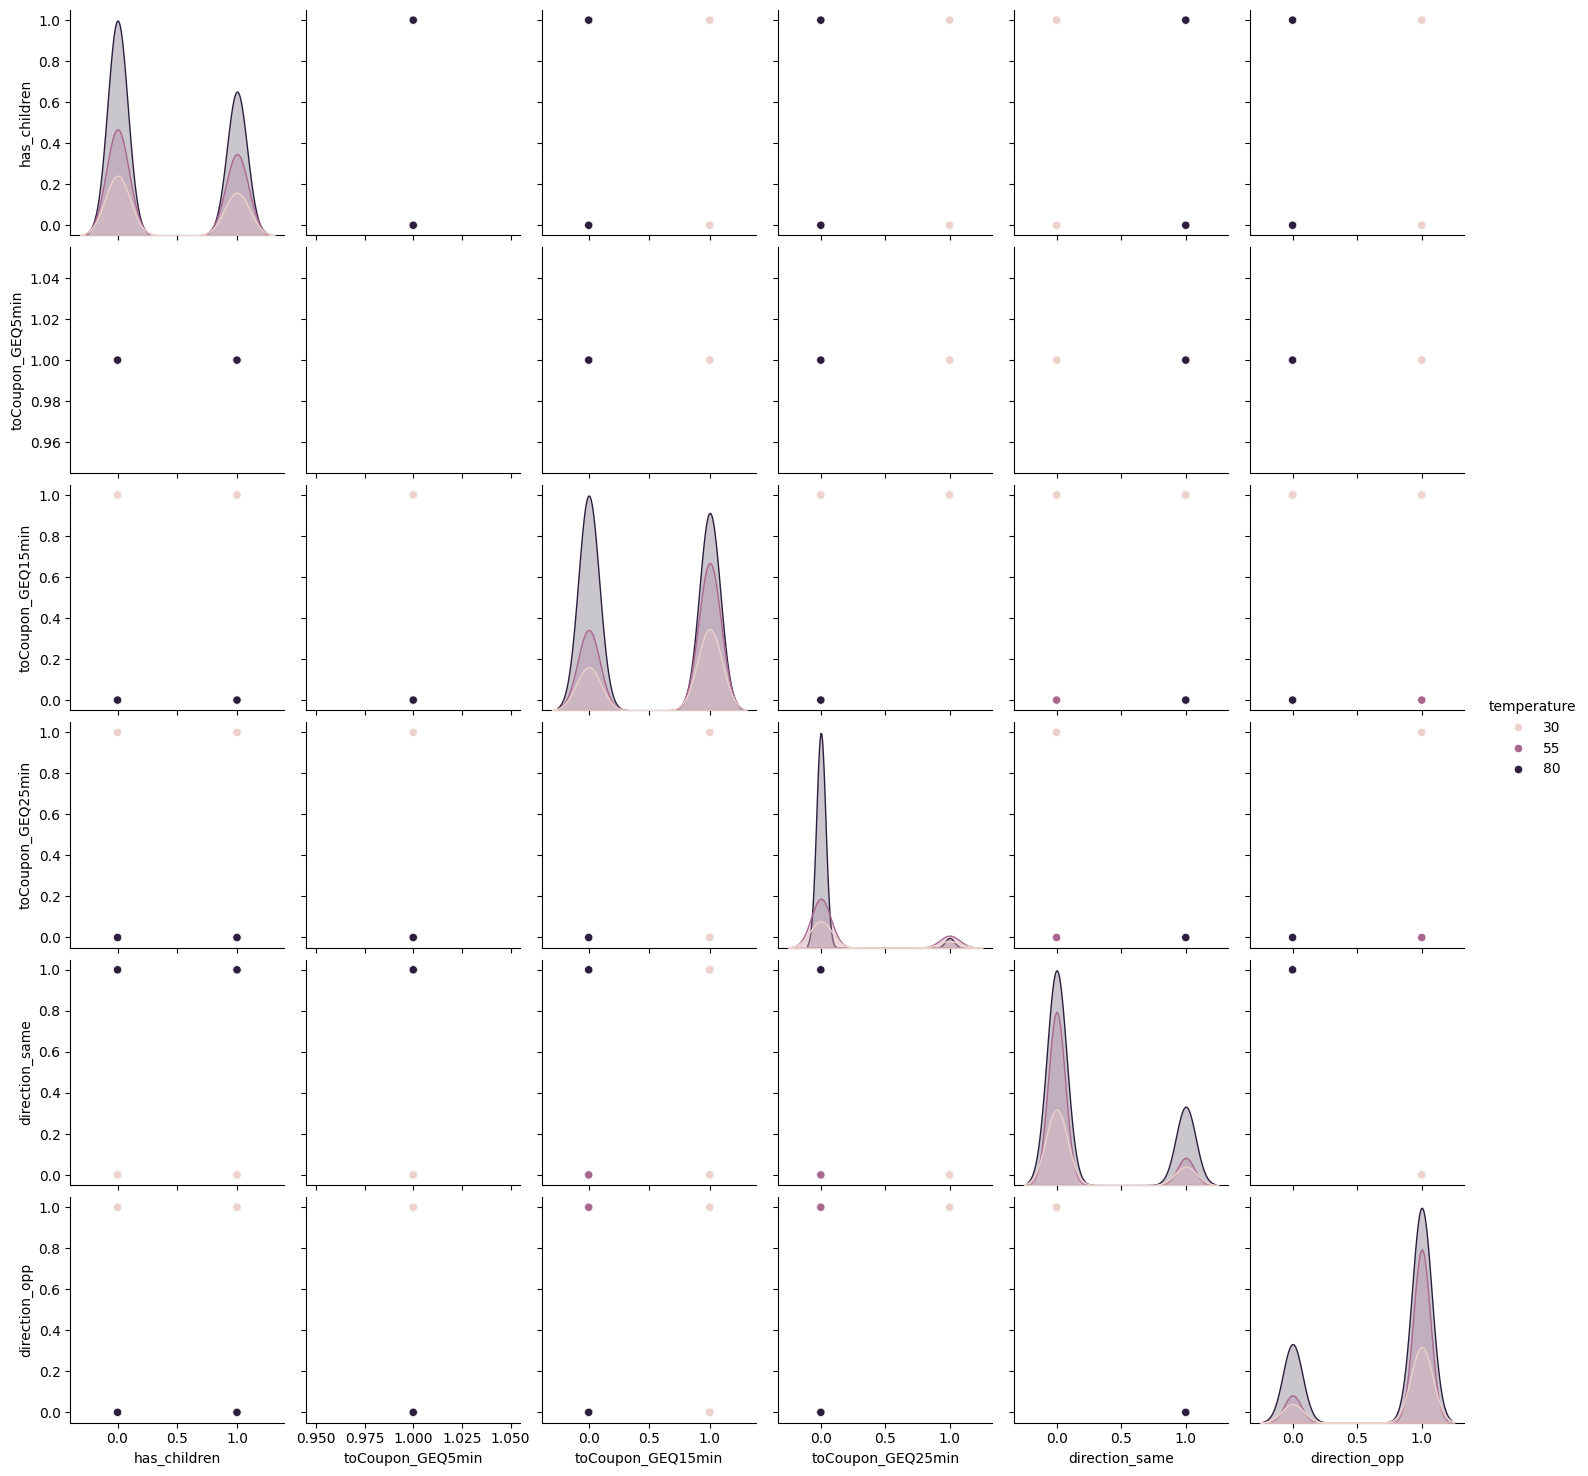

In [3]:
import seaborn as sns

sns.pairplot(X, hue='temperature')

## Data cleanup and transformation

### Check the null values

In [4]:
X.isnull().sum()

,0
destination,0
passenger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


## Removing rows with null values

The number of rows with null values is insignificant based on the size of the dataset

In [5]:
X.drop(['car'],axis=1, inplace=True)

<ipython-input-5-87aa87fc0751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['car'],axis=1, inplace=True)


### Applying data encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

features_object = X.dtypes == 'object'
features_object = X.columns[features_object]
features_object



Index([], dtype='object')

### Before encoding

In [11]:
X.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,2,55,2,4,0,0,0,3,...,4,4,5,1,0,1,0,0,0,1
1,1,1,2,80,0,2,1,0,0,3,...,4,4,5,1,0,1,0,0,0,1
2,1,1,2,80,0,1,1,0,0,3,...,4,4,5,1,0,1,1,0,0,1
3,1,1,2,80,2,2,1,0,0,3,...,4,4,5,1,0,1,1,0,0,1
4,1,1,2,80,2,2,0,0,0,3,...,4,4,5,1,0,1,1,0,0,1


In [12]:
for feature in features_object:
  X[feature] = LabelEncoder().fit_transform(X[feature])

### After encoding

In [13]:
X.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,2,55,2,4,0,0,0,3,...,4,4,5,1,0,1,0,0,0,1
1,1,1,2,80,0,2,1,0,0,3,...,4,4,5,1,0,1,0,0,0,1
2,1,1,2,80,0,1,1,0,0,3,...,4,4,5,1,0,1,1,0,0,1
3,1,1,2,80,2,2,1,0,0,3,...,4,4,5,1,0,1,1,0,0,1
4,1,1,2,80,2,2,0,0,0,3,...,4,4,5,1,0,1,1,0,0,1


## Normalize Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

for feature in X.columns:
  X[feature] = MinMaxScaler().fit_transform(X[[feature]])

<ipython-input-14-76be8a84a737>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = MinMaxScaler().fit_transform(X[[feature]])
<ipython-input-14-76be8a84a737>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = MinMaxScaler().fit_transform(X[[feature]])
<ipython-input-14-76be8a84a737>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

### Reducing dimensionality

In [15]:
pip install seaborn matplotlib

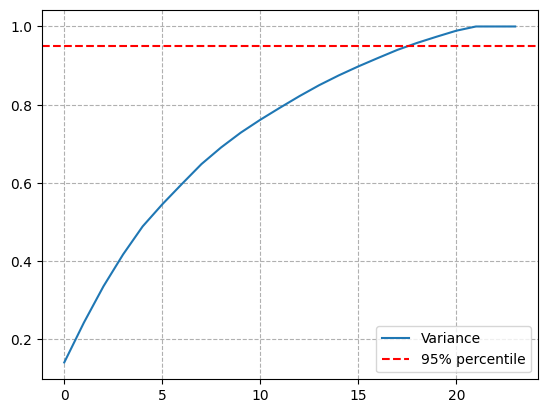

In [16]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variance')
plt.axhline(0.95, color='red', linestyle='--', label='95% percentile')
plt.grid(True, linestyle='--')
plt.legend()

#### It will be used 9 *componets*

In [17]:
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X)

## Classifiers

### Spliting data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

### Tuning Hyperparameters & Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

#### KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Text(0, 0.5, 'Mean Accuracy')

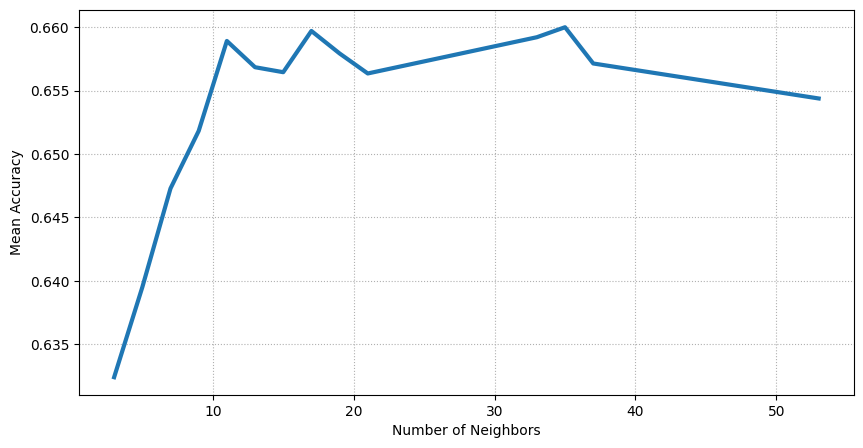

In [20]:
from sklearn.neighbors import KNeighborsClassifier

ks = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 37, 33, 35, 53]
accs = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  accs.append(scores.mean())

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=ks, y=accs, linewidth=3, ax=ax)
plt.grid(True, linestyle=':')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy')

#### SVC

##### Degree

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Text(0, 0.5, 'Mean Accuracy')

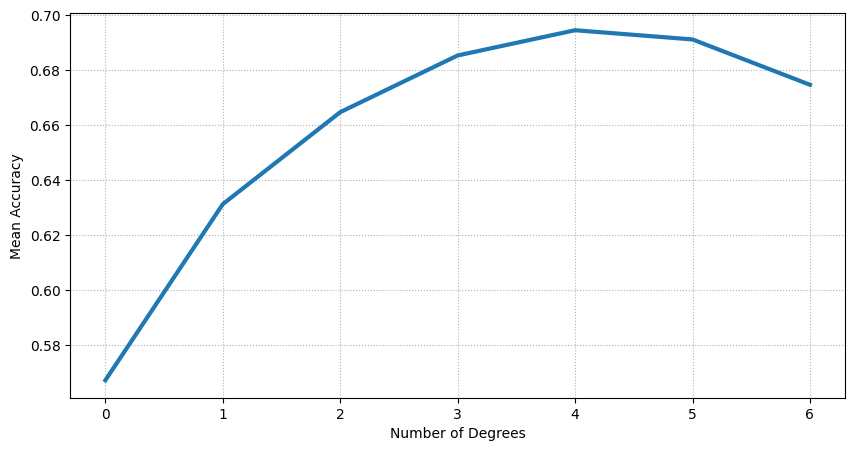

In [21]:
from sklearn.svm import SVC

degrees = [0, 1, 2, 3, 4, 5, 6]
accs = []
for d in degrees:
  svc = SVC(kernel='poly', degree=d)
  svc.fit(X_train, y_train)
  scores = cross_val_score(svc, X_train, y_train, cv=5)
  accs.append(scores.mean())

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=degrees, y=accs, linewidth=3, ax=ax)
plt.grid(True, linestyle=':')
plt.xlabel('Number of Degrees')
plt.ylabel('Mean Accuracy')

#### DT

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Text(0, 0.5, 'Mean Accuracy')

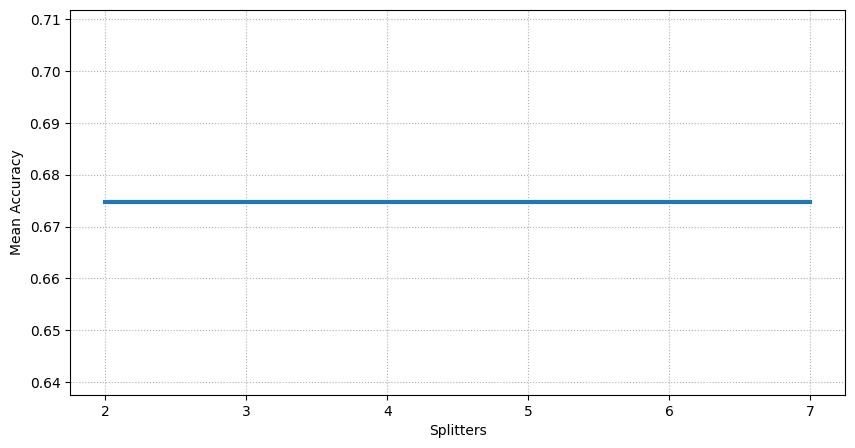

In [40]:
from sklearn.tree import DecisionTreeClassifier
min_samples_splits = [2, 3, 4, 5, 6, 7]
splitters = ["best", "random"]
accs = []
for s in min_samples_splits:
  dt = DecisionTreeClassifier(min_samples_split=s, max_features="sqrt")
  dt.fit(X_train, y_train)
  scores = cross_val_score(svc, X_train, y_train, cv=5)
  accs.append(scores.mean())

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=min_samples_splits, y=accs, linewidth=3, ax=ax)
#sns.lineplot(x=splitters, y=accs, linewidth=3, ax=ax)
plt.grid(True, linestyle=':')
plt.xlabel('Splitters')
plt.ylabel('Mean Accuracy')

#### RF

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

Text(0, 0.5, 'Mean Accuracy')

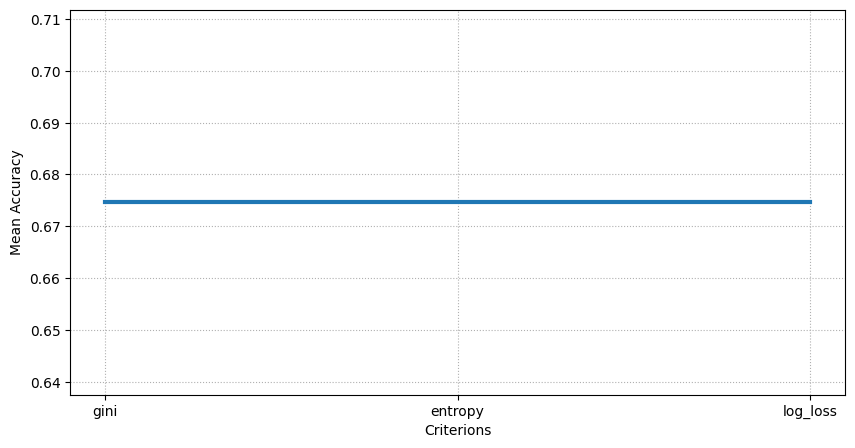

In [26]:
from sklearn.ensemble import RandomForestClassifier

criterions = ["gini", "entropy", "log_loss"]
accs = []
for c in criterions:
  dt = RandomForestClassifier(criterion=c)
  dt.fit(X_train, y_train)
  scores = cross_val_score(svc, X_train, y_train, cv=5)
  accs.append(scores.mean())

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=criterions, y=accs, linewidth=3, ax=ax)
plt.grid(True, linestyle=':')
plt.xlabel('Criterions')
plt.ylabel('Mean Accuracy')

### Define classifiers

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers = {
  'KNN': KNeighborsClassifier(n_neighbors=35),
  'SVM': SVC(kernel='poly', degree=4),
  'DT' : DecisionTreeClassifier(splitter="random", max_features="sqrt"),
  'RF' : RandomForestClassifier(criterion="entropy")
}

### Training classifiers

In [29]:
import time

training_accuracy = {}
training_time     = {}

for classifier in classifiers:
  start_time = time.process_time()
  classifiers[classifier].fit(X_train, y_train)
  training_accuracy[classifier] = classifiers[classifier].score(X_train, y_train)
  training_time[classifier] = time.process_time() - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<ipython-input-30-11b4ffc158b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(training_accuracy.keys()), y=list(training_accuracy.values()), ax=ax[0], ec='k', palette='pastel')
<ipython-input-30-11b4ffc158b3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(training_time.keys()), y=list(training_time.values()), ax=ax[1], ec='k', palette='husl')


Text(0.5, 1.0, 'Training Time')

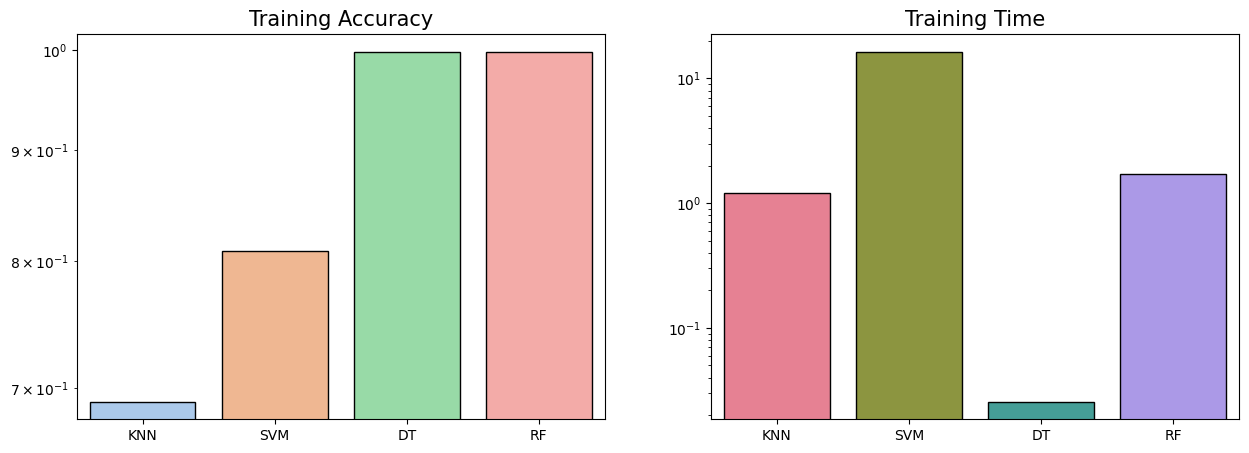

In [30]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=list(training_accuracy.keys()), y=list(training_accuracy.values()), ax=ax[0], ec='k', palette='pastel')
sns.barplot(x=list(training_time.keys()), y=list(training_time.values()), ax=ax[1], ec='k', palette='husl')

ax[0].set_yscale('log')
ax[0].set_title('Training Accuracy', size=15)
ax[1].set_yscale('log')
ax[1].set_title('Training Time', size=15)

# Ploting Test Data Performance

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metrics = {}
for classifier in classifiers:
  metrics[classifier] = {}
  predictions = classifiers[classifier].predict(X_test)
  metrics[classifier]['accuracy'] = accuracy_score(y_test, predictions)
  metrics[classifier]['recall'] = recall_score(y_test, predictions, average="weighted")
  metrics[classifier]['f1'] = f1_score(y_test, predictions, average="weighted")
  metrics[classifier]['precision'] = precision_score(y_test, predictions, average="weighted")
result = pd.DataFrame(metrics)

In [32]:
result

,KNN,SVM,DT,RF
accuracy,0.654710,0.695704,0.593615,0.739456
recall,0.654710,0.695704,0.593615,0.739456
f1,0.640031,0.692700,0.594327,0.737657
precision,0.652183,0.693093,0.595239,0.737890


<ipython-input-33-9a893b5d4724>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(result.columns), y=list(result.iloc[0]), ax=ax[0][0], ec='k', palette='pastel')
<ipython-input-33-9a893b5d4724>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(result.columns), y=list(result.iloc[1]), ax=ax[0][1], ec='k', palette='husl')
<ipython-input-33-9a893b5d4724>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(result.columns), y=list(result.iloc[2]), ax=ax[1][0], ec='k', palette='deep')
<ipython-input-33-9a893b5d4724>:6: FutureWarnin

Text(0.5, 1.0, 'F1')

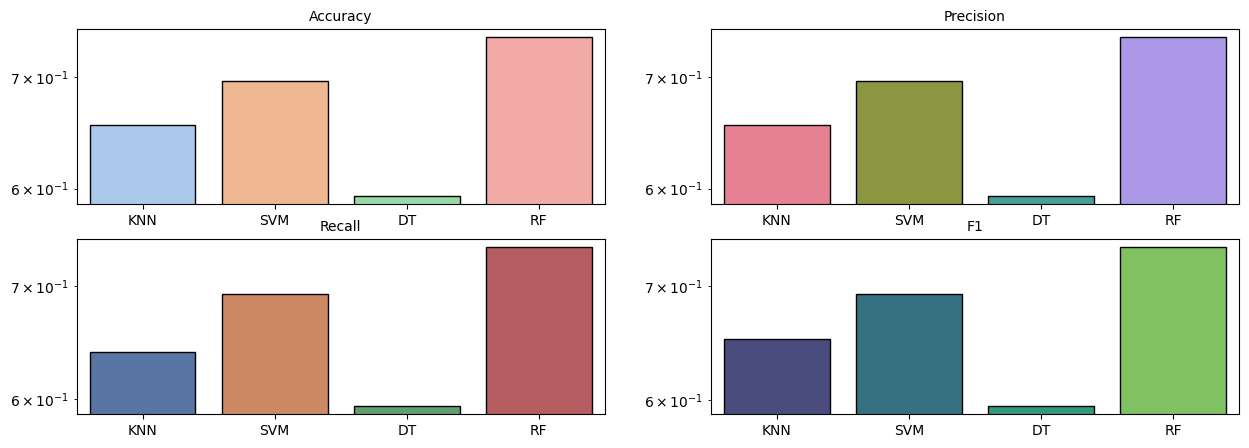

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(15, 5))

sns.barplot(x=list(result.columns), y=list(result.iloc[0]), ax=ax[0][0], ec='k', palette='pastel')
sns.barplot(x=list(result.columns), y=list(result.iloc[1]), ax=ax[0][1], ec='k', palette='husl')
sns.barplot(x=list(result.columns), y=list(result.iloc[2]), ax=ax[1][0], ec='k', palette='deep')
sns.barplot(x=list(result.columns), y=list(result.iloc[3]), ax=ax[1][1], ec='k', palette='viridis')


ax[0][0].set_yscale('log')
ax[0][0].set_title('Accuracy', size=10)
ax[0][1].set_yscale('log')
ax[0][1].set_title('Precision', size=10)
ax[1][0].set_yscale('log')
ax[1][0].set_title('Recall', size=10)
ax[1][1].set_yscale('log')
ax[1][1].set_title('F1', size=10)

## Confusion matrix

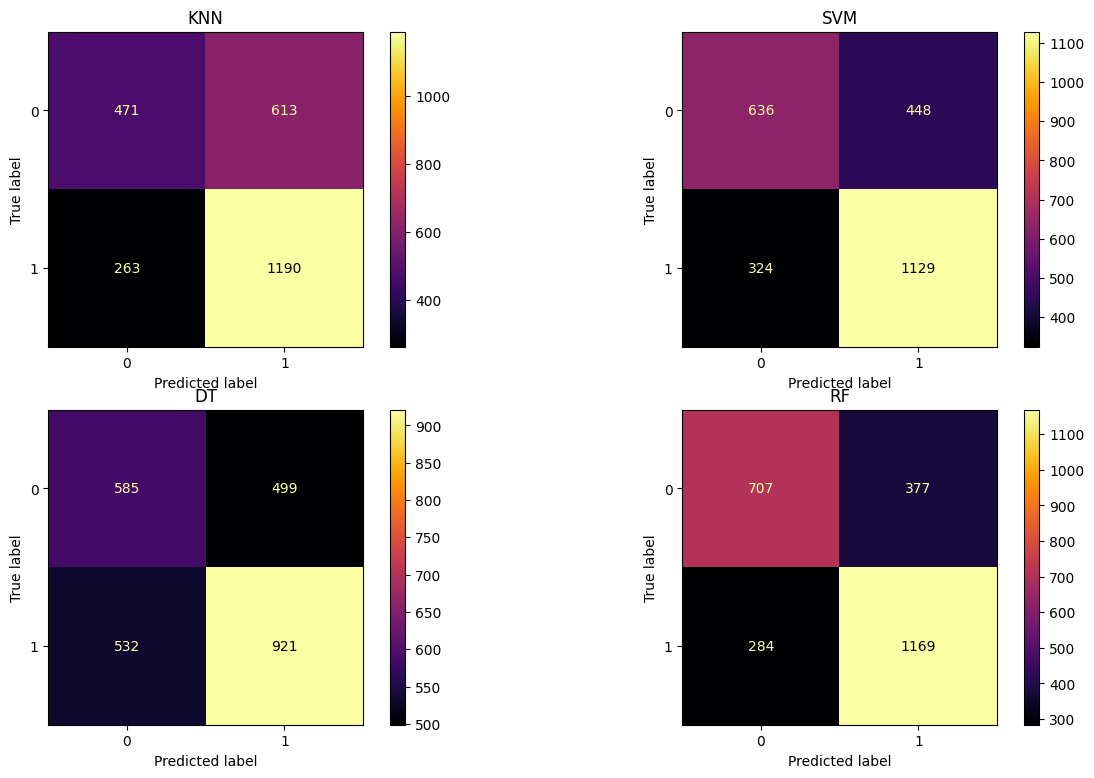

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))
ax = ax.flatten()

for idx, clf in enumerate(classifiers):
  predictions = classifiers[clf].predict(X_test)
  cm = confusion_matrix(y_test, predictions, )
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifiers[clf].classes_, )
  disp.plot(ax=ax[idx], cmap='inferno')
  ax[idx].set_title(clf)

# Visualization Region

In [35]:
pip install mlxtend

In [36]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
dados_pca = pca.fit_transform(X)
x_treino, x_teste, y_treino, y_teste = train_test_split(dados_pca, y, test_size=0.2, random_state=99, shuffle=True)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


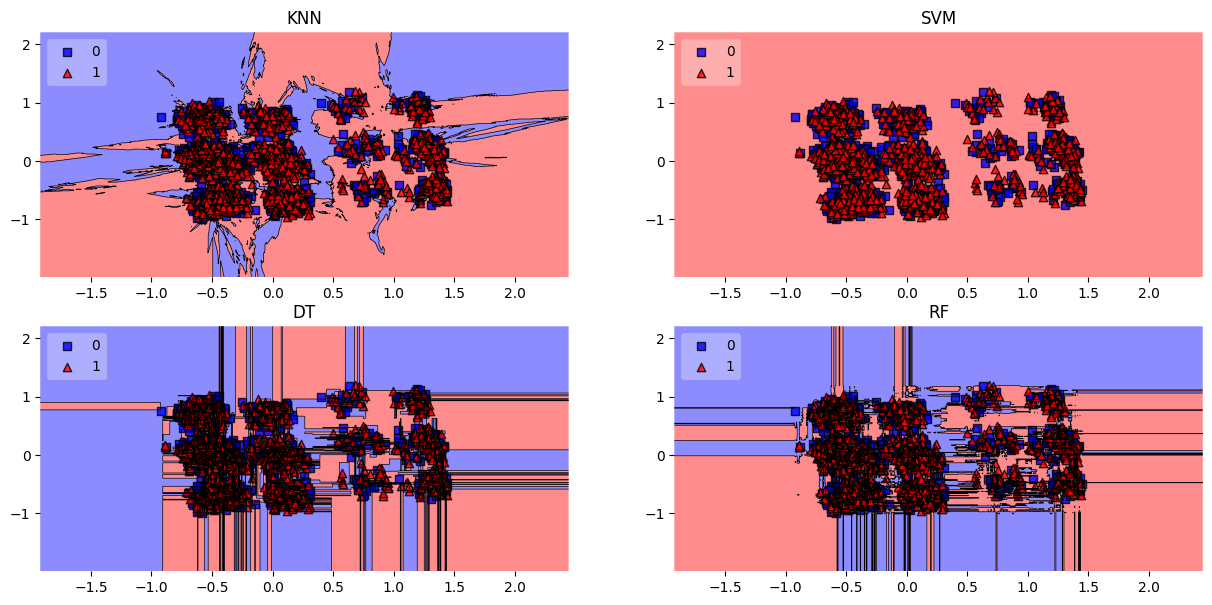

In [37]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
ax = ax.flatten()

for idx, clf in enumerate(classifiers):
  classifiers[clf].fit(x_treino, y_treino)
  plot_decision_regions(x_teste, y_teste.values.ravel(), clf=classifiers[clf], legend=2, ax=ax[idx], colors='blue,red')
  ax[idx].set_title(clf)